<a href="https://www.kaggle.com/code/najeebz/multi-class-prediction-obesity-risk-xgboost-0-9?scriptVersionId=165066529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)
### Playground Series - Season 4, Episode 2

_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


1. [Walter Reade, Ashley Chow. (2024). Multi-Class Prediction of Obesity Risk. Kaggle.](https://www.kaggle.com/competitions/playground-series-s4e2)

1. [Fabio Mendoza Palechor, and ,Alexis de la Hoz Manotas. (2023). Obesity or CVD risk (Classify/Regressor/Cluster) [Data set]. Kaggle.](https://doi.org/10.34740/KAGGLE/DSV/7009925)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/najeebz/multi-class-prediction-obesity-risk-xgboost-0-9)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Multi-Class Prediction of Obesity Risk. Competition Submission. Kaggle. https://www.kaggle.com/najeebz/multi-class-prediction-obesity-risk-xgboost-0-9

# Other Contributions to this Competition:
1. [Obesity Risk Multi Class MLP Classifier | Detailed](https://www.kaggle.com/code/najeebz/obesity-risk-multi-class-mlp-classifier-detailed)
1. [MultiClass Prediction LGBM Simple and Easy](https://www.kaggle.com/code/najeebz/multiclass-prediction-lgbm-simple-and-easy)
1. [Obesity Risk Viz, EDA, Auto Visualization tools](https://www.kaggle.com/code/najeebz/obesity-risk-viz-eda-auto-visualization-tools)

# What is MultiClass Classification?
Multiclass prediction, also known as #multiclassclassification, is a machine learning task that involves predicting the correct class label for a given input. With #machinelearning and #AI algorithms, models are trained on labeled datasets to generalize and make predictions on new instances. Popular methods include One-vs-All (#OvA), Multinomial Logistic Regression, Support Vector Machines (#SVM), Decision Trees, Random Forests, and Neural Networks (#DeepLearning). Evaluation metrics like accuracy, precision, recall, and F1 score assess model performance. Stay ahead with #datascience and #ML. #TechTrends #ArtificialIntelligence

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from warnings import filterwarnings;
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [49]:
df=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')


In [50]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [51]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [52]:
df.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [53]:
test.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [54]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Dataset Description:

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA.

Files
train.csv - the training dataset; NObeyesdad is the categorical target
test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row
sample_submission.csv - a sample submission file in the correct format

# Visualization

In [55]:
cat_cols=df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']]
num_cols=df[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]


# Categorical Columns


## Gender: [Male/Female] 
Gender has been found to have a significant impact on obesity rates based on available data. Multiple studies have examined the relationship between gender and obesity, and while the results may vary across populations and regions, certain trends have emerged.

Prevalence: Generally, women tend to have higher rates of obesity compared to men. However, it's important to note that this is not universally true and can vary depending on the specific population being studied.

Body Fat Distribution: Gender differences in body fat distribution play a role in obesity. Men tend to accumulate fat in the abdominal area, leading to an "apple-shaped" body, whereas women often accumulate fat in the hips, buttocks, and thighs, resulting in a "pear-shaped" body. Abdominal obesity, seen more commonly in men, is associated with a higher risk of metabolic disorders such as diabetes and cardiovascular diseases.

Hormonal Factors: Hormones can influence body weight and fat distribution. For example, estrogen plays a role in regulating body fat distribution in women. Changes in hormonal levels during menopause may contribute to weight gain and a shift towards abdominal fat deposition.

Socioeconomic Factors: Socioeconomic factors can interact with gender to influence obesity rates. For instance, in certain populations, women may have limited access to education, employment opportunities, and healthcare, which can contribute to higher obesity rates. Societal expectations and cultural norms regarding body image can also affect women's attitudes towards weight and contribute to disordered eating patterns.

Lifestyle Factors: Gender differences in lifestyle behaviors can contribute to obesity. Factors such as dietary choices, physical activity levels, and sedentary behavior patterns can vary between men and women. Cultural and social expectations can influence these behaviors differently for each gender.

It's important to note that these observations are based on general trends and population-level data. Individual experiences and circumstances can vary significantly, and it's crucial to approach obesity prevention and management on an individualized basis. Additionally, research in this area is ongoing, and new findings may emerge in the future that could further our understanding of the gender impact on obesity.

## Family History with Overweight: [ Yes/No ]

Family history plays a significant role in the development of obesity. Numerous studies have shown that genetics can influence an individual's susceptibility to obesity. While genetics alone cannot fully explain the obesity epidemic, they do contribute to an individual's predisposition to gaining weight.

Several genes have been identified that are associated with obesity, including genes involved in regulating appetite, metabolism, and fat storage. If individuals have a family history of obesity, they may carry certain genetic variations that make them more likely to develop obesity themselves.

However, it's important to note that genetics are not the sole determinant of obesity. Environmental factors, such as diet, physical activity levels, and socioeconomic status, also play a crucial role. These factors can interact with genetic predispositions to influence weight gain and obesity risk.

Having a family history of obesity can serve as an indicator of increased risk, but it does not mean that obesity is inevitable. Adopting a healthy lifestyle, including a balanced diet and regular physical activity, can help mitigate the genetic predisposition and reduce the risk of obesity.

It's worth mentioning that family history is just one piece of the puzzle. Other factors, such as individual behaviors, cultural influences, and social determinants of health, also contribute to the development of obesity. Taking a comprehensive approach that addresses both genetic and environmental factors is essential for understanding and addressing obesity.

## FAVC (Frequent Consumption of High Caloric Food) [Yes/No]

Frequent consumption of high-caloric food can have significant effects on obesity. When individuals regularly consume food that is high in calories, it can lead to an energy imbalance where the intake of calories exceeds the expenditure of energy through physical activity. This imbalance can result in weight gain and the development of obesity.

Obesity is a complex condition characterized by excessive accumulation of body fat, which can have detrimental effects on overall health. High-caloric foods, often rich in fats and sugars, contribute to weight gain and obesity due to their high energy density. Such foods include processed snacks, sugary beverages, fast food, and desserts.

The consumption of high-caloric foods triggers a series of physiological responses in the body. These foods are often palatable and can lead to increased appetite, which may result in overeating. Moreover, they can affect the reward centers in the brain, leading to cravings and a desire for more of these foods.

The excessive calorie intake from high-caloric foods can also disrupt the body's metabolic processes. Regularly consuming more calories than the body needs can lead to the storage of excess energy as fat. Over time, this can lead to weight gain and an increase in body mass index (BMI).

Obesity is associated with a range of adverse health outcomes, including an increased risk of chronic conditions such as type 2 diabetes, cardiovascular disease, certain types of cancer, and musculoskeletal disorders. It can also have negative effects on mental health and quality of life.

To address the effects of frequent consumption of high-caloric food on obesity, it is important to promote a balanced diet that includes a variety of nutrient-dense foods. This includes fruits, vegetables, whole grains, lean proteins, and healthy fats. Additionally, engaging in regular physical activity and maintaining a healthy lifestyle can help prevent and manage obesity.



## CAEC (Consumption of food between meals) [No/Sometimes/Frequently/Always]

The consumption of food between meals can have a significant impact on obesity. Engaging in frequent snacking or consuming high-calorie foods outside of regular meals can contribute to weight gain and increase the risk of obesity.

One important keyword related to this topic is "energy imbalance." When individuals consume food between meals without considering their caloric needs, they often consume excess calories, leading to an energy imbalance. This energy imbalance occurs when the amount of energy consumed exceeds the amount of energy expended through physical activity and metabolism.

Another relevant keyword is "overeating." Snacking between meals can lead to overeating, as individuals may not be aware of the total amount of food they are consuming throughout the day. Overeating can result in a surplus of calories, which the body stores as fat, ultimately contributing to weight gain and obesity.

"High-calorie foods" is another crucial keyword. Many snacks available between meals tend to be calorie-dense and low in nutritional value. Common examples include sugary snacks, processed snacks, and fast food. These foods are often high in added sugars, unhealthy fats, and sodium, which can negatively impact overall health and contribute to obesity.

One more keyword to consider is "portion control." When individuals consume food between meals, they may not pay attention to portion sizes, leading to excessive calorie intake. Lack of portion control can result in consuming more calories than needed, making weight management challenging and increasing the risk of obesity.

In summary, the consumption of food between meals can impact obesity by contributing to an energy imbalance, overeating, consuming high-calorie foods, and disregarding portion control. Being mindful of the quality and quantity of snacks consumed between meals is essential for maintaining a healthy weight and preventing obesity.

## SMOKE [Yes/No]
Smoking has been found to have a complex relationship with obesity, with various effects and impacts on weight gain and metabolic processes. Here are some key points regarding how smoking impacts obesity:

Weight gain: Contrary to popular belief, smoking is often associated with lower body weight and a reduced risk of obesity. This association is primarily observed in current smokers, as smoking has been found to suppress appetite and increase metabolic rate, leading to decreased food intake and weight loss.

Metabolic effects: Smoking can influence metabolic processes in the body. For instance, it has been linked to alterations in insulin sensitivity and glucose metabolism, potentially increasing the risk of developing insulin resistance, type 2 diabetes, and metabolic syndrome. These effects can indirectly contribute to obesity over time.

Adiposity and body composition: While smoking may help reduce overall body weight, it can also affect body composition and distribution of fat. Some studies have suggested that smokers may have a higher proportion of visceral fat (fat stored around internal organs) compared to subcutaneous fat (fat stored beneath the skin). Visceral fat is associated with an increased risk of metabolic disorders and obesity-related health issues.

Leptin and appetite regulation: Leptin is a hormone produced by fat cells that plays a crucial role in regulating appetite and energy balance. Smoking has been found to decrease leptin levels, potentially affecting appetite regulation and leading to reduced food intake. However, this effect may diminish with long-term smoking or after quitting.

Inflammation and oxidative stress: Smoking is known to induce systemic inflammation and oxidative stress in the body. These processes can disrupt normal metabolic functioning and contribute to the development of obesity, as chronic inflammation is linked to metabolic dysfunction and weight gain.

Physical activity: Smoking can have a negative impact on physical activity levels. Smokers often have reduced exercise capacity and endurance due to the detrimental effects of smoking on lung function and cardiovascular health. This decrease in physical activity can contribute to weight gain and obesity.

It's important to note that while smoking may have some associations with lower body weight and reduced obesity risk, the overall health risks associated with smoking far outweigh any potential benefits. Quitting smoking is highly recommended for overall health and well-being, including reducing the risk of obesity-related complications.

## SCC Calories consumption monitoring: [Yes/No] 
Calorie consumption monitoring can have a significant impact on obesity. Obesity is generally caused by an energy imbalance, where calorie intake exceeds calorie expenditure over an extended period. Monitoring calorie consumption helps individuals become more aware of their eating habits and can support them in making healthier choices.

Here are some ways in which monitoring calorie consumption can impact obesity:

Awareness and Accountability: Tracking calorie intake helps individuals become more conscious of the number of calories they consume throughout the day. This awareness can be an eye-opener, as people often underestimate the calorie content of their meals. By holding themselves accountable for their food choices, individuals may be more motivated to make healthier decisions and avoid overeating.

Portion Control: Calorie monitoring encourages portion control. People often consume larger portions than necessary, which leads to increased calorie intake. By tracking calories, individuals can better understand appropriate portion sizes and make adjustments to their meals accordingly. This can help reduce overall calorie consumption and support weight management.

Education and Knowledge: Calorie monitoring provides individuals with valuable information about the nutritional content of different foods. It helps them understand which foods are high in calories and which are more nutrient-dense. This knowledge empowers individuals to make informed choices about their diet and opt for healthier, lower-calorie options.

Behavior Modification: Calorie tracking can help identify patterns and behaviors that contribute to overeating or unhealthy eating habits. It allows individuals to recognize triggers for overconsumption, such as emotional eating or mindless snacking. Armed with this information, individuals can work on modifying their behavior and developing strategies to address these triggers, leading to healthier eating habits and weight management.

Goal Setting and Motivation: Monitoring calorie consumption enables individuals to set specific goals related to their calorie intake. Whether it's aiming for a certain daily calorie limit or gradually reducing calorie intake over time, having measurable targets can provide motivation and a sense of achievement. By consistently tracking progress, individuals can stay motivated and make necessary adjustments to meet their goals.

It's important to note that while monitoring calorie consumption can be a useful tool, it should be part of a comprehensive approach to weight management that includes other factors like physical activity, overall dietary quality, and lifestyle changes. Consulting with a healthcare professional or a registered dietitian can provide personalized guidance and support in managing obesity.

## CALC Consumption of alcohol [No/Sometimes/Frequently]
Alcohol consumption can have a significant impact on obesity. While moderate alcohol consumption may not lead to immediate weight gain, excessive or regular consumption of alcohol can contribute to weight gain and increase the risk of obesity. Here are some ways in which alcohol consumption can affect obesity:

High-Calorie Content: Alcoholic beverages are often high in calories. They can contain a significant amount of sugar, carbohydrates, and fats, which contribute to overall calorie intake. Regularly consuming high-calorie alcoholic drinks can lead to an energy imbalance, where the body takes in more calories than it burns, resulting in weight gain and obesity.

Increased Appetite: Alcohol can stimulate the appetite and lead to increased food consumption. It can lower inhibitions and impair judgment, making it easier to overeat or make unhealthy food choices. This combination of increased appetite and impaired judgment can contribute to excessive calorie intake and weight gain.

Impaired Fat Metabolism: When alcohol is consumed, the body prioritizes metabolizing the alcohol over other nutrients, including fats. This can lead to the accumulation of fatty acids in the body and hinder the breakdown of stored fat. As a result, regular alcohol consumption can interfere with the body's ability to burn fat efficiently and contribute to weight gain.

Liver Function: Excessive alcohol consumption can cause liver damage, such as alcoholic fatty liver disease. When the liver is compromised, it becomes less effective at metabolizing fats and regulating blood sugar levels. This can lead to an increased risk of insulin resistance and metabolic disorders, which are closely linked to obesity.

Poor Sleep Quality: Alcohol can disrupt sleep patterns and impair the quality of sleep. Inadequate sleep has been associated with weight gain and obesity. When sleep is disrupted, it can affect hormone regulation, increase appetite, and lead to poor food choices, all of which can contribute to weight gain.

Empty Calories: Alcoholic beverages are often referred to as "empty calories" because they provide calories but lack essential nutrients. These extra calories from alcohol can add up quickly and contribute to weight gain without providing any nutritional benefit.

It's important to note that moderate alcohol consumption, defined as one drink per day for women and up to two drinks per day for men, may not have a significant impact on obesity for individuals who maintain a balanced diet and an active lifestyle. However, excessive or regular alcohol consumption can contribute to weight gain and increase the risk of obesity. If you're concerned about your weight or overall health, it's always a good idea to consult with a healthcare professional.

## MTrans Mode of Transportation [Walking/Bike/Motorbike/Public Transportation/Automobile]
There is considerable evidence to suggest that transportation modes can have an impact on obesity rates. However, it's important to note that obesity is a complex issue influenced by various factors, including diet, physical activity levels, genetics, and socioeconomic factors. Transportation mode is just one of many factors that can contribute to obesity.

That being said, here are some data-based evidences regarding transportation modes and their association with obesity:

Active Transportation:
Active transportation, such as walking or cycling, has been associated with lower obesity rates. Several studies have found that individuals who engage in active commuting have lower body mass index (BMI) and reduced obesity risk compared to those who rely on motorized transportation. For example, a study published in the British Medical Journal found that active commuting (walking or cycling) was associated with a lower BMI and reduced obesity risk in adults.

Public Transportation:
The use of public transportation, such as buses or trains, often involves walking to and from transit stops, which can contribute to higher physical activity levels. Research has shown that individuals who use public transportation tend to have lower obesity rates compared to those who primarily rely on private vehicles. A study published in the American Journal of Preventive Medicine found that adults who used public transportation had significantly lower BMI and reduced odds of obesity compared to those who relied on private vehicles.

Sedentary Transportation:
Modes of transportation that involve prolonged sitting, such as driving or using motorized transport, have been associated with higher obesity rates. The sedentary nature of these transportation modes often means lower levels of physical activity. A study published in the journal Preventive Medicine Reports found that individuals who commuted by car had higher BMI and increased odds of obesity compared to those who used active transportation.

Urban Design and Walkability:
The built environment, including urban design and walkability, can influence transportation choices and physical activity levels. Communities with pedestrian-friendly infrastructure, such as sidewalks, bike lanes, and well-connected public transit systems, tend to have lower obesity rates. A study published in the American Journal of Public Health found that neighborhoods with higher walkability scores were associated with lower obesity rates and higher physical activity levels.

It's important to note that these associations do not necessarily imply causation, and other factors can contribute to the observed relationships. Additionally, individual behaviors and preferences play a significant role in transportation choices and obesity outcomes.

## NObesity Target Column:
1. Underweight Less than 18.5
1. Normal 18.5 to 24.9
1. Overweight 25.0 to 29.9
1. Obesity I 30.0 to 34.9
1. Obesity II 35.0 to 39.9
1. Obesity III Higher than 40

## Categorical Data Value Counts Plots

Commented the code to reduce the execution time. Focussed on Prediction. you can fork and uncomment to execute the visualizations. or view the earlier versions.

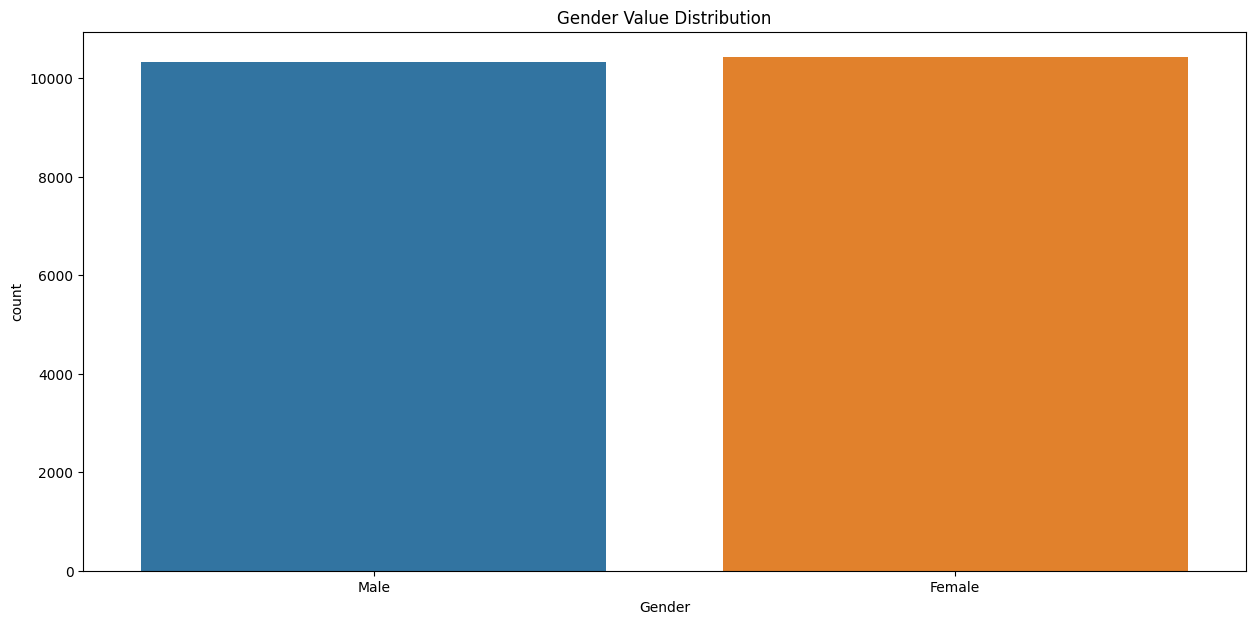

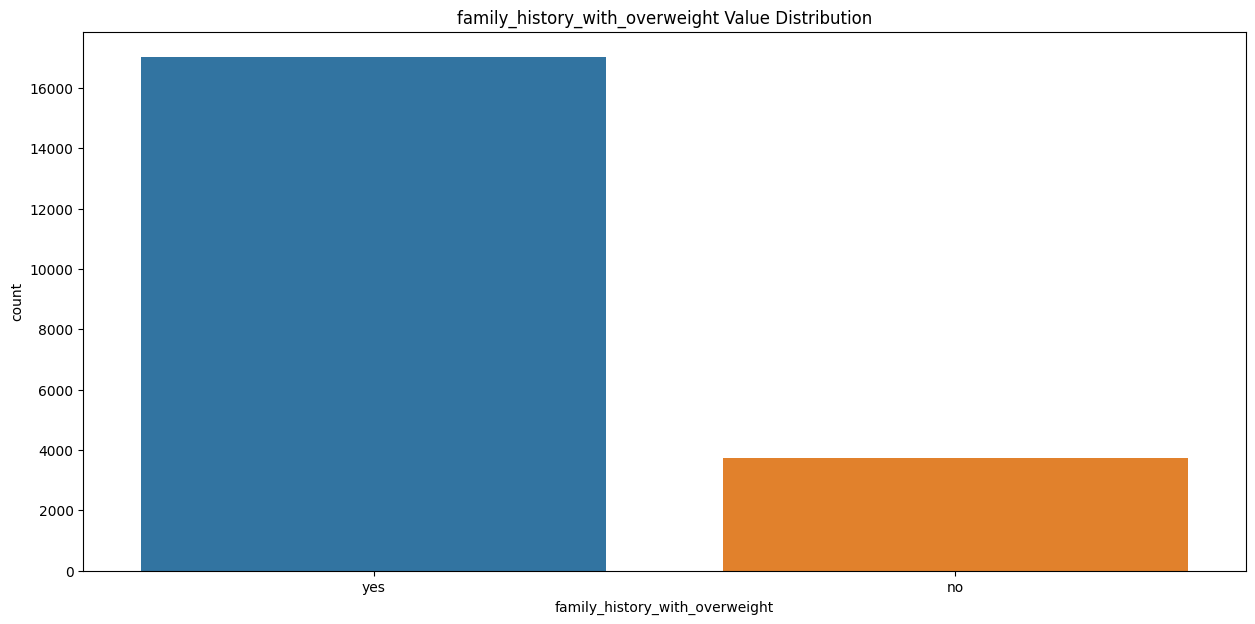

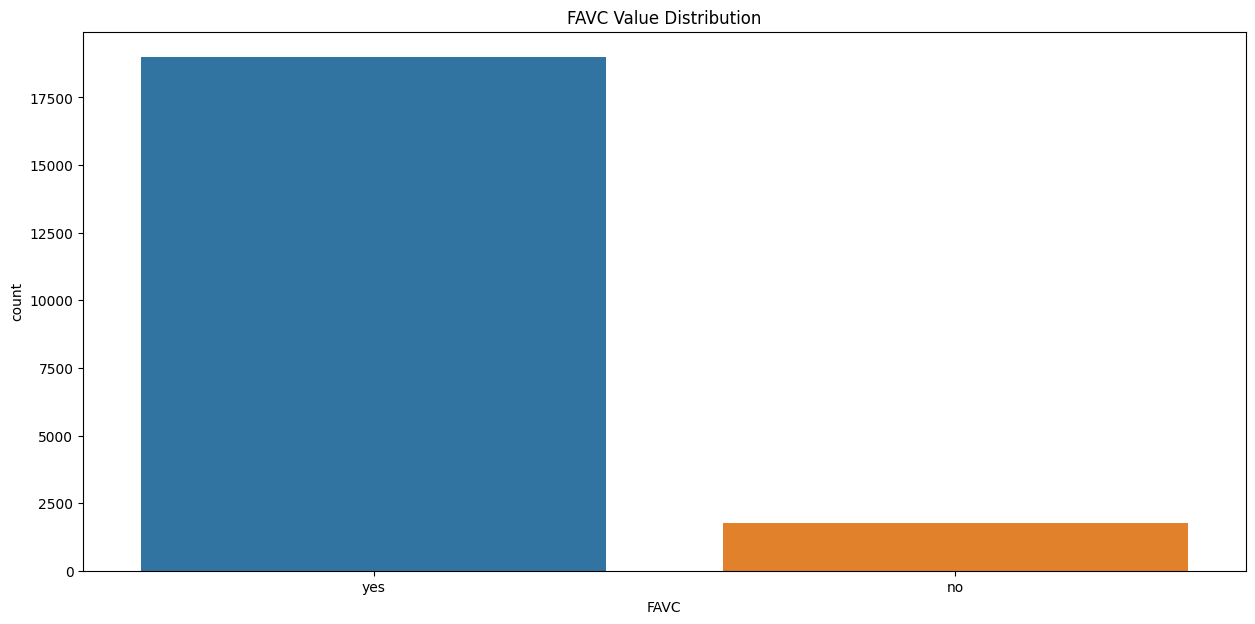

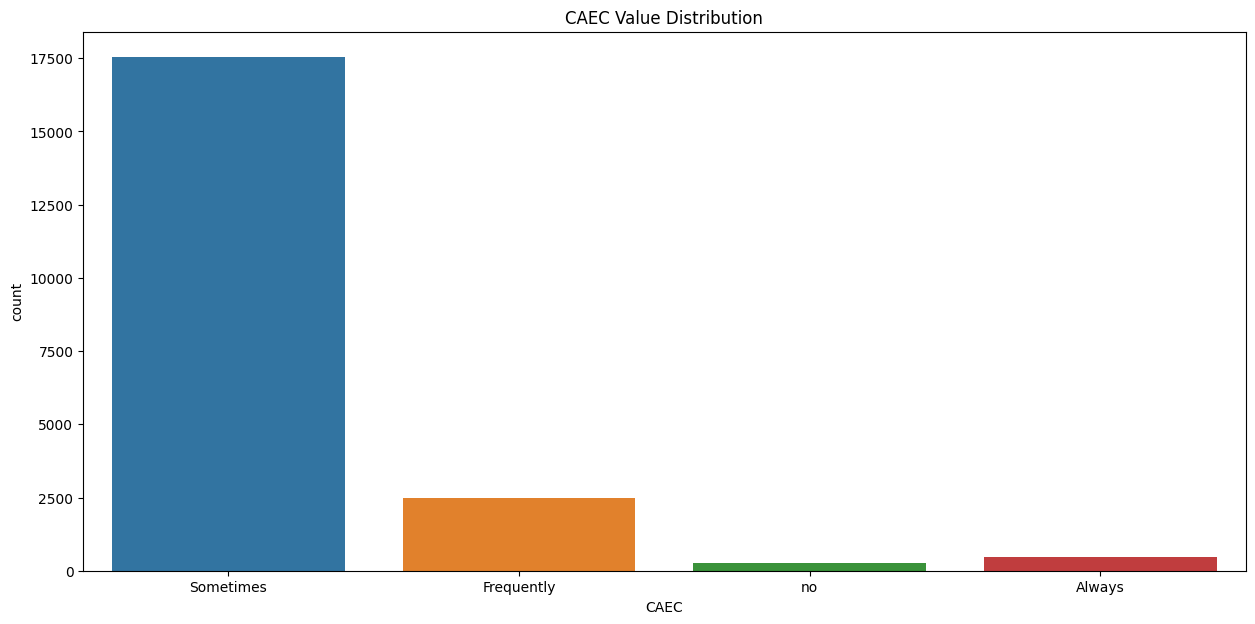

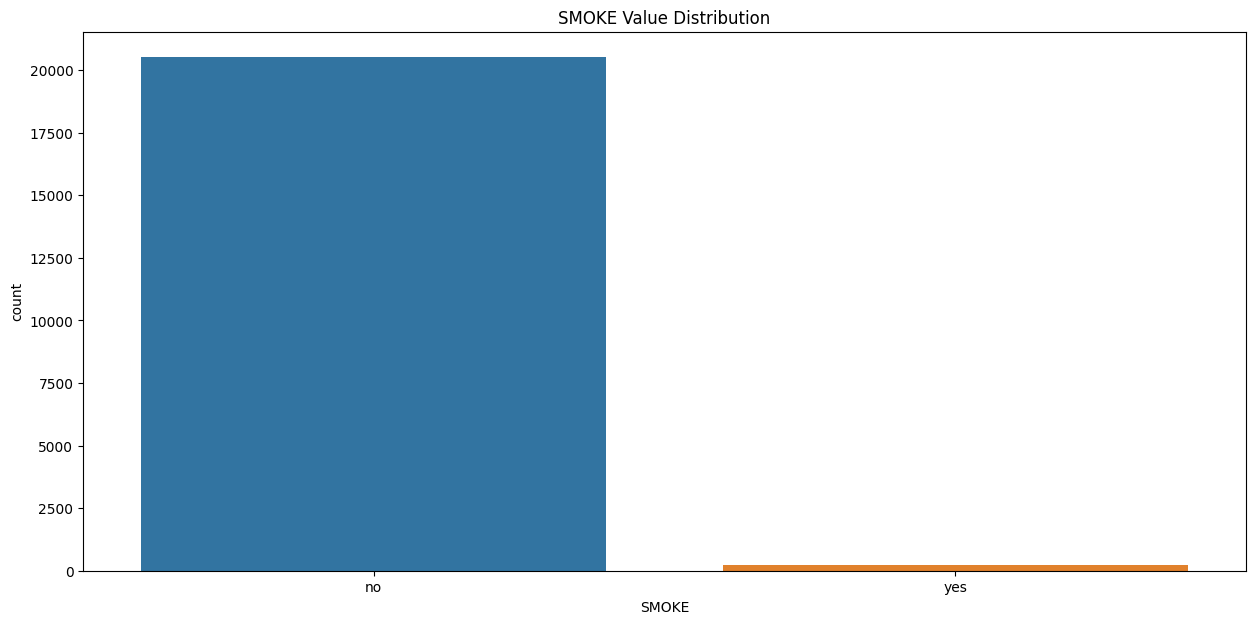

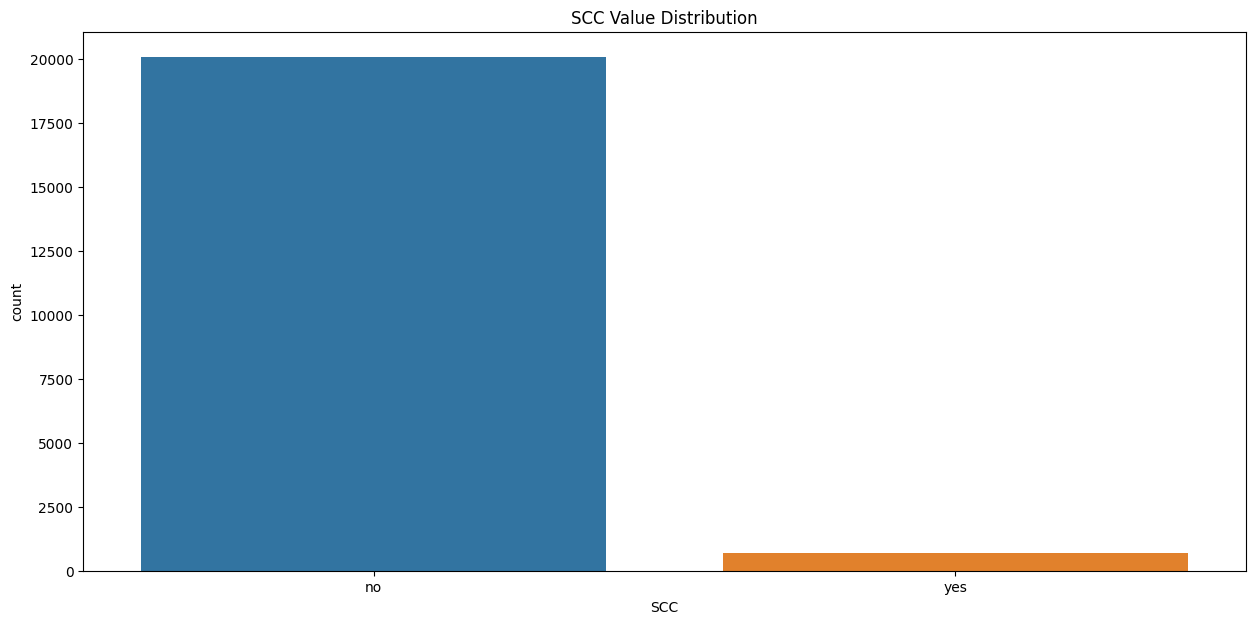

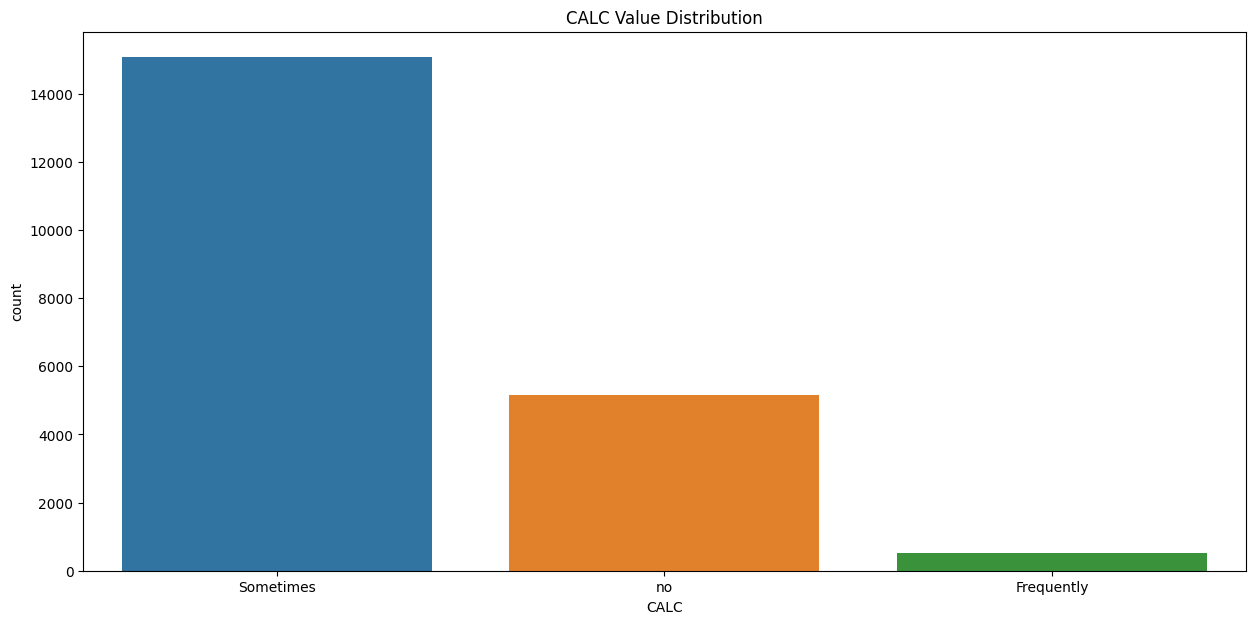

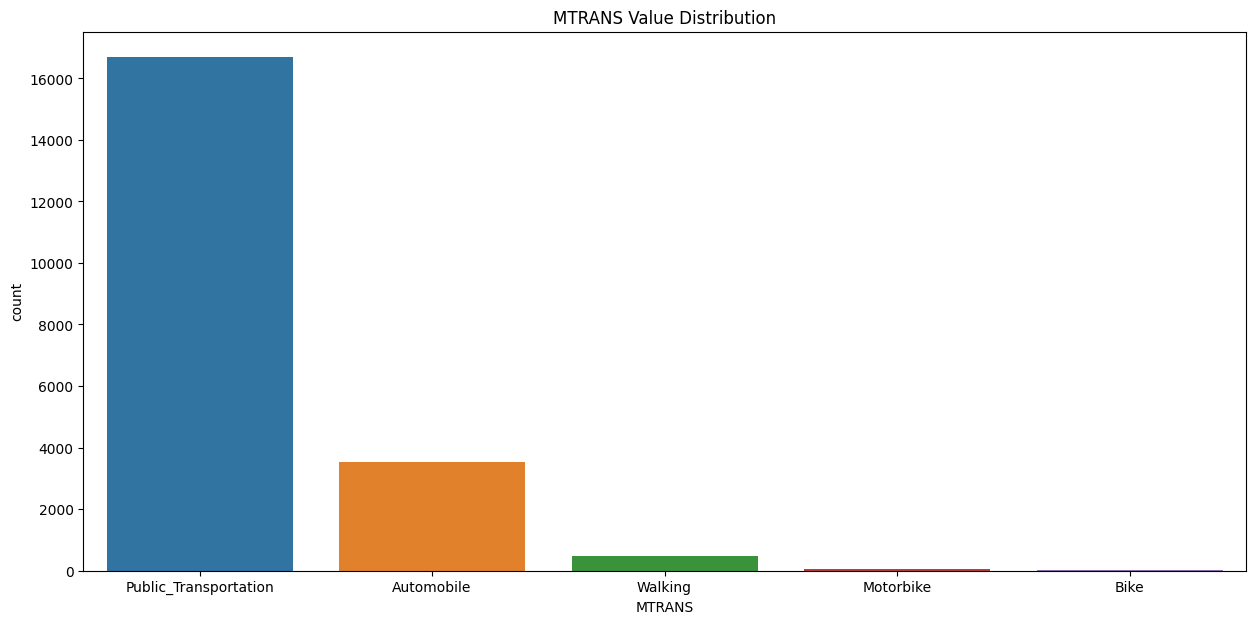

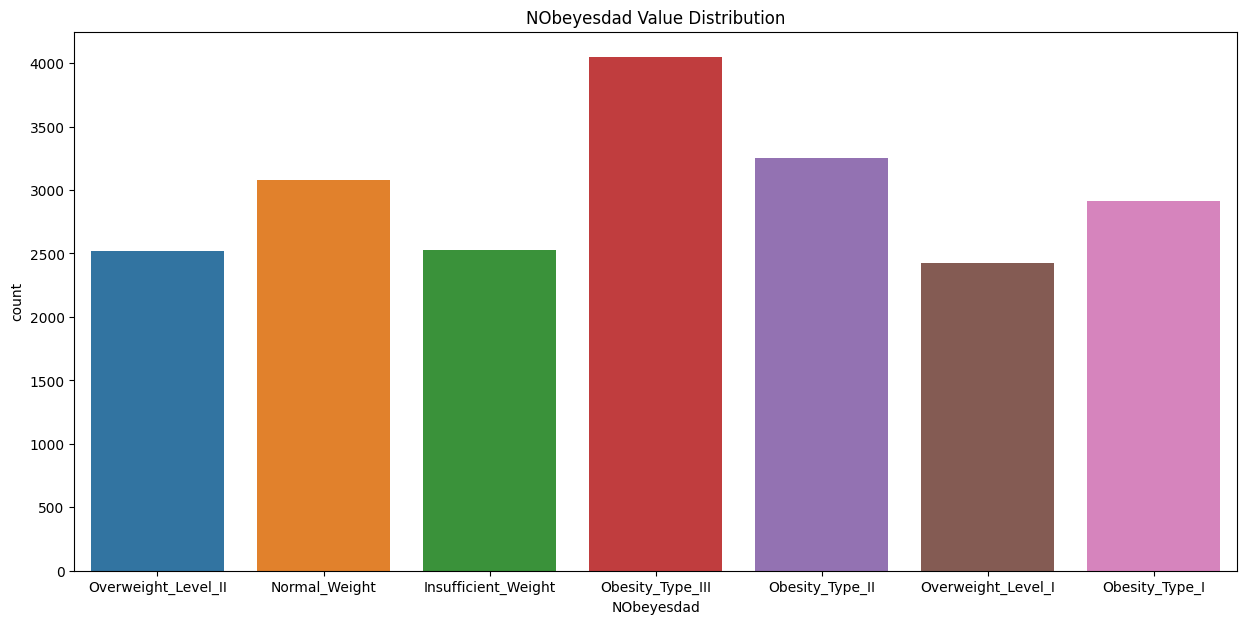

In [56]:
for col in cat_cols:
    plt.figure(figsize=[15,7])
    sns.countplot(df,x=df[col]).set(title= col+' Value Distribution')
    plt.show()

# Numerical Columns:
## Age
Age can have a significant impact on obesity. There are several factors that contribute to this relationship:

Metabolism: As people age, their metabolism tends to slow down. This means that their bodies burn fewer calories at rest. If caloric intake remains the same or increases, weight gain can occur, leading to obesity.

Muscle mass: With age, there is a natural decline in muscle mass, a condition known as sarcopenia. Muscles are more metabolically active than fat tissue, so a loss of muscle mass can further contribute to a decrease in metabolic rate and an increased risk of weight gain and obesity.

Hormonal changes: Hormonal changes that occur with age can affect body composition and weight regulation. For example, in women, menopause is associated with a decrease in estrogen levels, which can lead to a redistribution of fat from the hips and thighs to the abdominal area, increasing the risk of abdominal obesity.

Lifestyle changes: As people get older, they may experience changes in their lifestyle that can contribute to weight gain and obesity. These changes can include decreased physical activity levels, increased sedentary behavior, and changes in dietary habits.

Medical conditions: Certain medical conditions become more common with age and can contribute to weight gain and obesity. For example, conditions such as hypothyroidism, diabetes, and certain medications used to manage chronic conditions can affect weight regulation.

It's important to note that while age can increase the risk of obesity, it is not inevitable. Healthy lifestyle choices, such as regular physical activity and a balanced diet, can help mitigate the effects of aging on weight gain and obesity. It's always recommended to consult with a healthcare professional for personalized advice and guidance on weight management at any age.


## Height
Height can have an indirect impact on obesity, as it is one of the factors considered in calculating body mass index (BMI), a commonly used measure of weight status. BMI is calculated by dividing a person's weight in kilograms by the square of their height in meters.

Since height is a component of the BMI calculation, individuals who are taller tend to have a higher BMI threshold for classifying as overweight or obese compared to shorter individuals. This means that two individuals with the same weight but different heights may have different BMI values and thus fall into different weight categories.

However, it's important to note that BMI is a crude measure of body composition and does not directly measure body fat or overall health. It does not account for factors such as muscle mass, bone density, or individual variations in body composition. Therefore, relying solely on BMI to assess obesity can lead to inaccurate conclusions, especially in athletes or individuals with a high muscle mass.

That being said, height itself does not directly cause obesity. Obesity is primarily influenced by factors such as diet, physical activity levels, genetics, socio-economic factors, and environmental influences. These factors play a more significant role in the development of obesity than height alone.

It's also worth mentioning that while height may influence BMI thresholds, it does not necessarily imply a higher risk of obesity-related health problems. Other factors, such as waist circumference, body fat distribution, and metabolic health markers, are more closely associated with obesity-related health risks.

In summary, while height indirectly affects the calculation of BMI and may influence weight categorization, it is not a direct cause of obesity. The development of obesity is a complex interplay of various genetic, lifestyle, and environmental factors.

## Weight
Weight and obesity are closely related, but they are not the same thing. Obesity is a medical condition characterized by excessive body fat accumulation to the extent that it may have a negative impact on health. Weight, on the other hand, refers to the total mass of a person, including muscle, bone, organs, and fat.

While weight is an important factor in determining obesity, it is not the sole determinant. Body composition, which refers to the proportion of fat and lean mass in the body, also plays a significant role. Two individuals with the same weight can have different body compositions, with one having a higher percentage of body fat and the other having more muscle mass.

Obesity is commonly assessed using body mass index (BMI), which is calculated by dividing a person's weight in kilograms by the square of their height in meters. While BMI provides a rough estimate of body fatness, it does not directly measure body fat or distribution. Therefore, it is possible for individuals with a high muscle mass, such as athletes or bodybuilders, to have a high BMI without being obese.

That being said, there is a strong association between excess weight and obesity. People who carry excess body fat are at a higher risk of developing obesity-related health conditions, including type 2 diabetes, cardiovascular disease, certain types of cancer, sleep apnea, and joint problems. Additionally, obesity can have a negative impact on mental health and overall quality of life.

It's important to note that weight and obesity are complex issues influenced by various factors, including genetics, lifestyle, diet, physical activity levels, and socioeconomic factors. While maintaining a healthy weight is generally associated with a lower risk of obesity-related health problems, it's crucial to focus on overall health and well-being rather than just weight alone. Adopting a balanced lifestyle that includes a nutritious diet, regular physical activity, and stress management is key to promoting good health. If you have concerns about your weight or obesity, it's advisable to consult with a healthcare professional who can provide personalized guidance and support.

## FCVC Frequency of consumption of vegetables
The frequency of consumption of vegetables can have an impact on obesity. Including vegetables in one's diet is generally associated with several health benefits, including weight management. Here's how the frequency of vegetable consumption can affect obesity:

High in Nutrients and Low in Calories: Vegetables are typically low in calories and high in nutrients, such as vitamins, minerals, and dietary fiber. By incorporating vegetables into your diet regularly, you can increase the volume of food you eat while consuming fewer calories. This can help you feel full and satisfied without consuming excess energy, which may contribute to weight gain.

Increased Satiety: Vegetables are rich in dietary fiber, which adds bulk to your meals and promotes feelings of fullness. When you consume vegetables regularly, they can help control hunger and reduce the likelihood of overeating or snacking on high-calorie, less nutritious foods. This can be beneficial for weight management and reducing the risk of obesity.

Replacement of High-Calorie Foods: Frequent consumption of vegetables can help displace high-calorie, low-nutrient foods in your diet. By choosing vegetables over calorie-dense options like sugary snacks, processed foods, or high-fat meals, you can reduce your overall calorie intake. This calorie reduction, when combined with a balanced diet and regular physical activity, can contribute to weight loss or weight maintenance.

Improved Gut Health: Vegetables contain prebiotic fibers that promote the growth of beneficial gut bacteria. A healthy gut microbiome has been linked to various aspects of overall health, including weight management. Some studies suggest that a diverse and balanced gut microbiome may be associated with a lower risk of obesity and related metabolic disorders.

It's important to note that while the frequency of consuming vegetables can play a role in obesity prevention, it's just one aspect of a healthy diet and lifestyle. A well-rounded approach that includes regular physical activity, portion control, balanced macronutrient intake, and overall calorie balance is crucial for weight management and reducing the risk of obesity. It's always a good idea to consult with a healthcare professional or registered dietitian for personalized advice based on your specific needs and circumstances.

## NCP number of main meals consumed
The number of main meals consumed can potentially impact obesity, although it is just one factor among many that contribute to weight gain or loss. The relationship between the number of meals and obesity is complex and can vary depending on various factors including individual metabolism, portion sizes, food choices, and overall calorie intake.

Traditionally, it has been recommended to have three main meals per day (breakfast, lunch, and dinner) with snacks in between, which is a common pattern in many cultures. However, some studies and dietary approaches suggest that consuming smaller, more frequent meals throughout the day (such as five to six smaller meals) may be beneficial for weight management and reducing obesity risk.

The rationale behind frequent, smaller meals is that it may help control hunger and prevent overeating during main meals. By spreading out calorie intake throughout the day, it is believed that this approach can help stabilize blood sugar levels and prevent extreme hunger, which can lead to unhealthy food choices and excessive calorie consumption.

On the other hand, some studies have found that having fewer meals per day, such as intermittent fasting or time-restricted eating, can also be effective for weight loss and reducing obesity risk. These approaches involve limiting the eating window to a specific period of time each day, typically around 8-10 hours, and fasting for the remainder of the day. By compressing the eating window, it may lead to a natural reduction in overall calorie intake and better metabolic control.

It's important to note that the impact of the number of main meals on obesity also depends on the quality and composition of those meals. Regardless of the number of meals, if the overall calorie intake is consistently higher than what the body needs, it can lead to weight gain and an increased risk of obesity.

In summary, while the number of main meals may have some influence on obesity, it is just one aspect of a complex equation. Factors such as total calorie intake, food choices, portion sizes, and overall dietary quality are equally important. It's crucial to focus on a balanced diet, portion control, and individual preferences when considering the impact of meal frequency on obesity. Consulting with a healthcare professional or registered dietitian can provide personalized guidance on weight management strategies.

## CH2O Consumption of water daily

Daily water consumption can have several impacts on obesity. While water alone is not a magic solution for weight loss, it can play a role in supporting a healthy weight management routine. Here are a few ways in which water consumption can affect obesity:

Caloric Intake Regulation: Drinking water before meals can help promote a feeling of fullness, which may lead to reduced calorie intake. Studies have indicated that individuals who consume water before meals tend to eat fewer calories during the meal, potentially aiding in weight management.

Hydration and Metabolism: Staying adequately hydrated is important for maintaining optimal metabolic function. Some studies suggest that mild dehydration may lead to a decrease in metabolic rate, potentially affecting weight regulation. By consuming an adequate amount of water, you can help support your body's metabolic processes.

Replacement for High-Calorie Beverages: Substituting high-calorie beverages like sugary sodas, energy drinks, or sweetened juices with water can significantly reduce overall calorie intake. These calorie-dense beverages are often associated with weight gain and obesity. Opting for water instead can help lower calorie consumption and contribute to weight management efforts.

Exercise Performance: Staying hydrated is crucial for optimal exercise performance. Regular physical activity plays a vital role in weight management and preventing obesity. When you drink enough water, it helps maintain proper hydration levels, which in turn can enhance your exercise capacity and endurance, allowing you to engage in more intense and longer workouts.

Water Retention and Bloating: Adequate water consumption can help prevent water retention and bloating. While it may seem counterintuitive, drinking enough water can actually help reduce bloating by promoting regular bowel movements and preventing constipation. When your body is properly hydrated, it's less likely to hold onto excess water, which can contribute to feelings of bloating and discomfort.

It's important to note that while water consumption can support weight management efforts, it should be part of a comprehensive approach that includes a balanced diet, regular exercise, and overall healthy lifestyle habits. Consult with a healthcare professional or a registered dietitian for personalized advice based on your specific needs and goals.

## FAF Physical activity frequency
Physical activity frequency plays a crucial role in the development and management of obesity. Regular physical activity is essential for maintaining a healthy body weight and preventing obesity-related complications. Here's how physical activity frequency affects obesity:

Caloric Expenditure: Engaging in physical activity increases energy expenditure, helping to burn calories and maintain a healthy weight. By exercising more frequently, individuals can create an energy deficit, which is essential for weight loss and prevention of obesity.

Metabolism: Regular physical activity boosts metabolism, both during exercise and at rest. This means that individuals who engage in physical activity more frequently have a higher resting metabolic rate, which can contribute to weight management and reduced risk of obesity.

Muscle Mass: Regular physical activity, especially strength training exercises, helps build and maintain lean muscle mass. Muscles are more metabolically active than fat tissue, meaning they burn more calories even at rest. By increasing muscle mass through frequent physical activity, individuals can enhance their ability to burn calories and manage body weight.

Appetite Regulation: Physical activity can influence appetite and satiety signals. Regular exercise has been shown to suppress appetite and reduce cravings for unhealthy foods. By exercising more frequently, individuals may have better control over their food intake, making it easier to maintain a healthy weight and prevent obesity.

Lifestyle Habits: Engaging in physical activity frequently often promotes other healthy lifestyle choices. People who exercise regularly are more likely to adopt other healthy behaviors, such as consuming a balanced diet, getting enough sleep, and managing stress. These factors collectively contribute to weight management and reduce the risk of obesity.

It's important to note that while physical activity frequency is crucial, it should be accompanied by a balanced diet to effectively manage obesity. It's recommended to consult with a healthcare professional or a qualified fitness expert to determine appropriate exercise frequency and intensity based on individual needs and health conditions.


## TUE
The average daily time spent using technology devices can have an impact on obesity, although it is just one of many factors that contribute to this complex issue. Here are a few ways in which excessive technology use can potentially influence obesity:

Sedentary Lifestyle: Extended periods of time spent using technology devices often involve sitting or lying down, leading to a sedentary lifestyle. This lack of physical activity can contribute to weight gain and obesity. When individuals spend more time using technology, they are likely to engage in fewer active pursuits such as exercise or outdoor activities.

Increased Screen Time: Technology devices, such as smartphones, tablets, and computers, often involve screen-based activities like browsing the internet, watching videos, playing games, or using social media. Prolonged screen time has been associated with a higher risk of obesity, particularly in children and adolescents. Excessive screen time can lead to unhealthy eating behaviors, such as mindless snacking or consuming calorie-dense foods, as well as disrupted sleep patterns, which can further contribute to weight gain.

Unhealthy Eating Habits: Technology use, especially when combined with sedentary behavior, can be linked to poor dietary choices. Individuals may be more likely to consume fast food, processed snacks, or sugary beverages while using technology devices. Additionally, exposure to food advertising through technology devices can influence food preferences and increase the likelihood of consuming unhealthy foods.

Disrupted Sleep Patterns: The use of technology devices, particularly before bedtime, can interfere with sleep duration and quality. Research suggests that inadequate sleep is associated with an increased risk of obesity. The blue light emitted by screens can suppress the production of melatonin, a hormone that regulates sleep-wake cycles, making it more difficult to fall asleep and achieve restful sleep. Poor sleep can disrupt appetite-regulating hormones, leading to increased hunger and cravings for high-calorie foods.

It's important to note that while excessive technology use can potentially contribute to obesity, it is just one aspect of a multifaceted issue. Other factors, such as genetics, diet, physical activity levels, socioeconomic status, and environmental factors, also play significant roles in the development of obesity. Maintaining a healthy lifestyle involves a balanced approach that includes regular physical activity, healthy eating habits, and mindful use of technology devices.

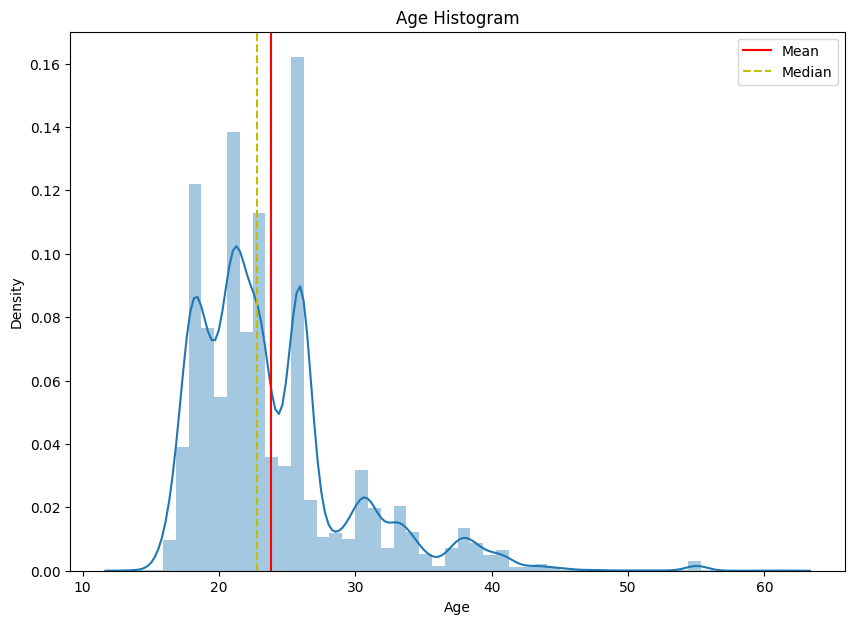

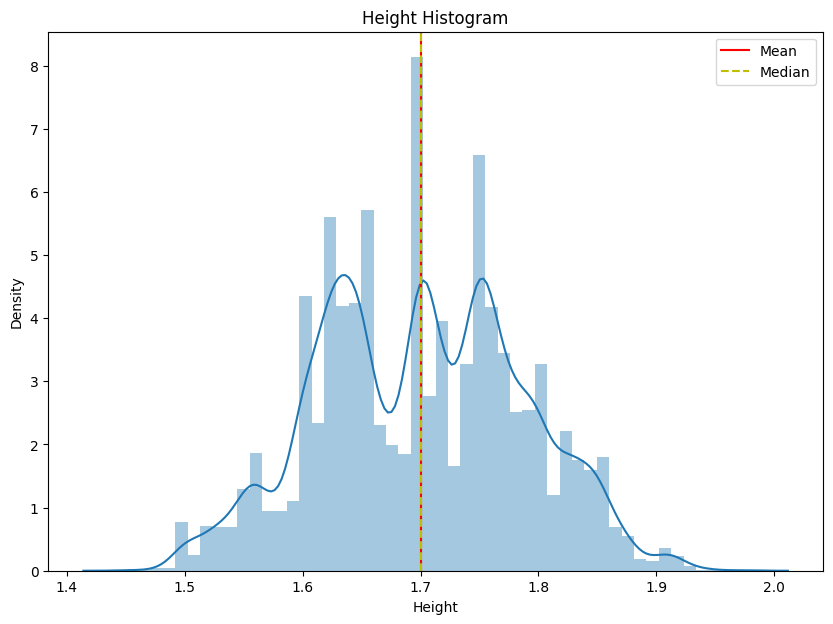

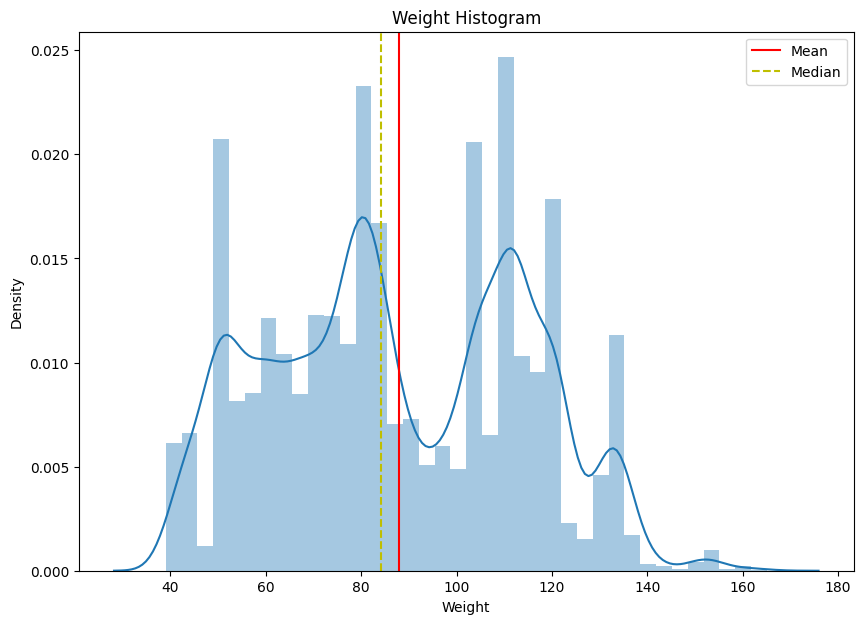

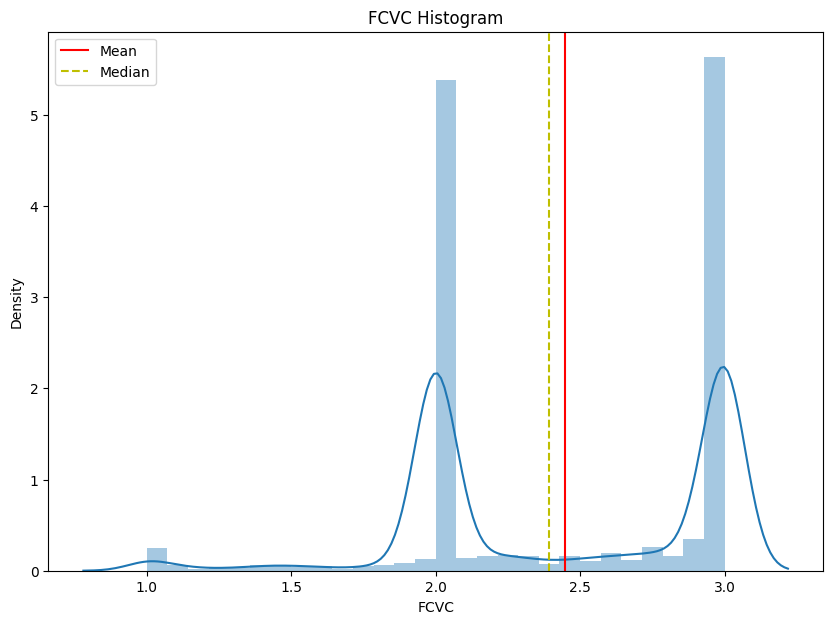

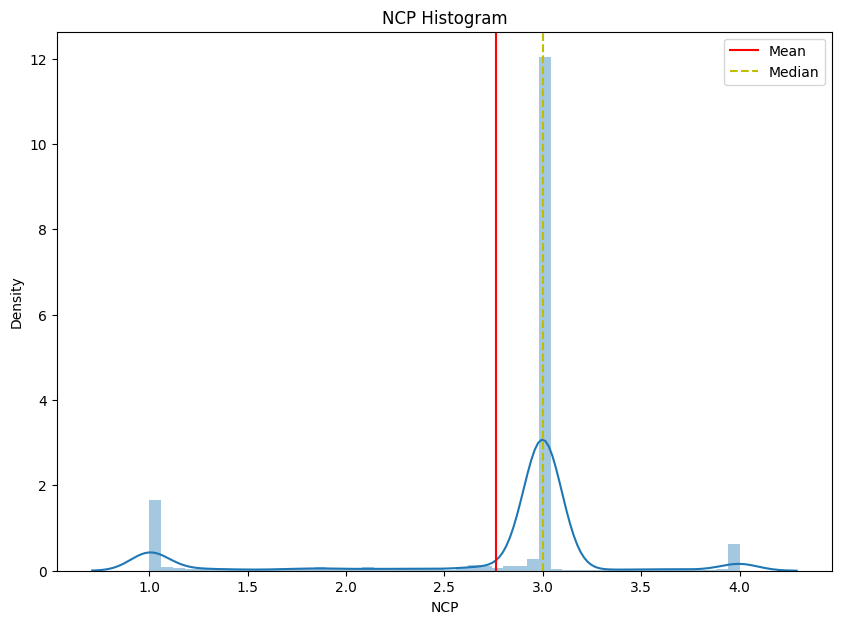

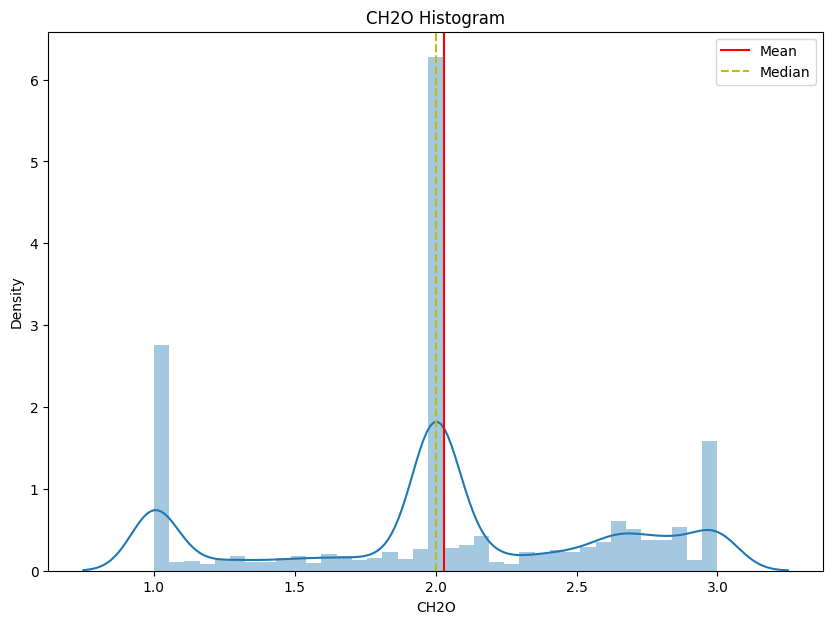

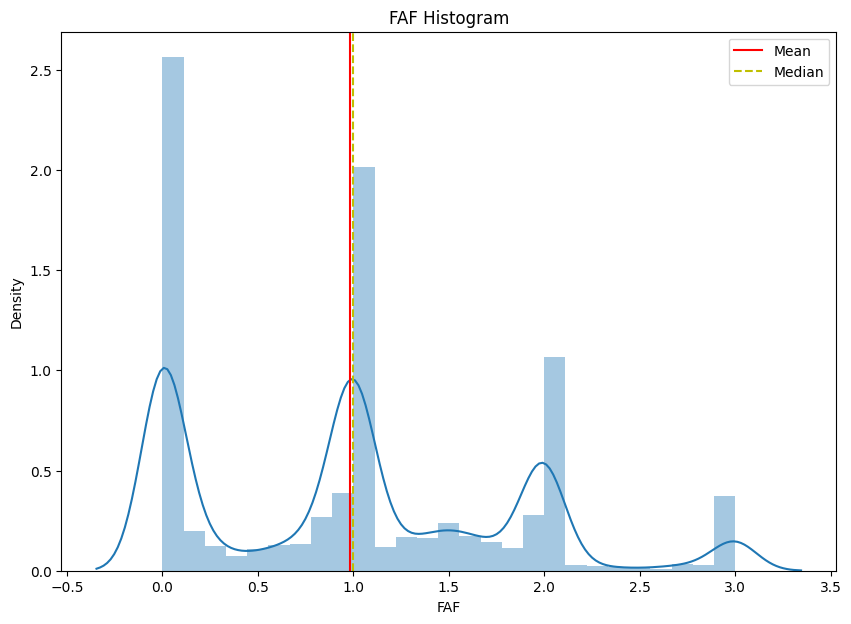

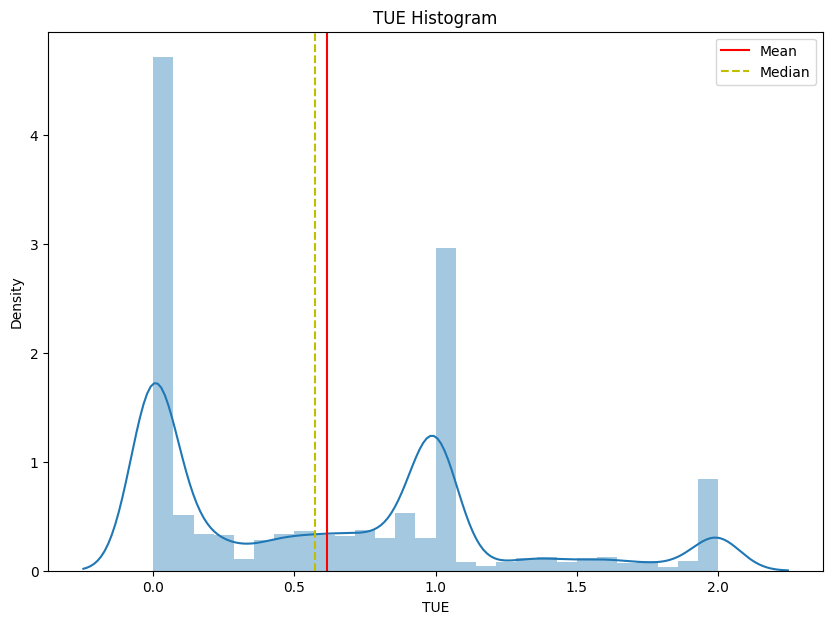

In [57]:
for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(df[col].mean(),color='r', label='Mean')
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()


# Categorical Columns Data Hierarchy 

In [58]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['NObeyesdad','Gender','MTRANS','family_history_with_overweight','SMOKE'], 
    color='Gender',color_discrete_map={'Male':'gold', 'Female':'darkblue'},
    width=1200, height=1200
)
fig.show()



## Analysis Note:
Obesity type 2 and Obesity type 3 are specific to one gender only as per the dataset

# Numerical Columns Gender wise Distribution in NObeyesdad

In [59]:
#for col in num_cols:
#    plt.figure(figsize=(15, 5))
#    sns.lineplot(data=df, x='NObeyesdad', y=col, hue='Gender').set(title= col+' vs NObeyesdad')
    

In [60]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## Observations:
1. No Nulls
1. There are seven classifications, in which the data is divided. The column to predict is NObeyesdad
1. There are two classes of NObeyesdad specific to Male and Female only.
1. Data Distribution is quite uniform, all classes have 2400-3200 representation apart of one class which has 4046 rows.


In [61]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Features Generation

## Feature 1: BMI
Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms (kg) and height in metres (m).

In the current dataset, BMI can be used to distinguis two classes out of the seven; (Normal_Weight and Insufficient_Weight)

In [62]:
df['BMI']=df['Weight']/df['Height']
test['BMI']=test['Weight']/test['Height']


<Axes: xlabel='NObeyesdad', ylabel='BMI'>

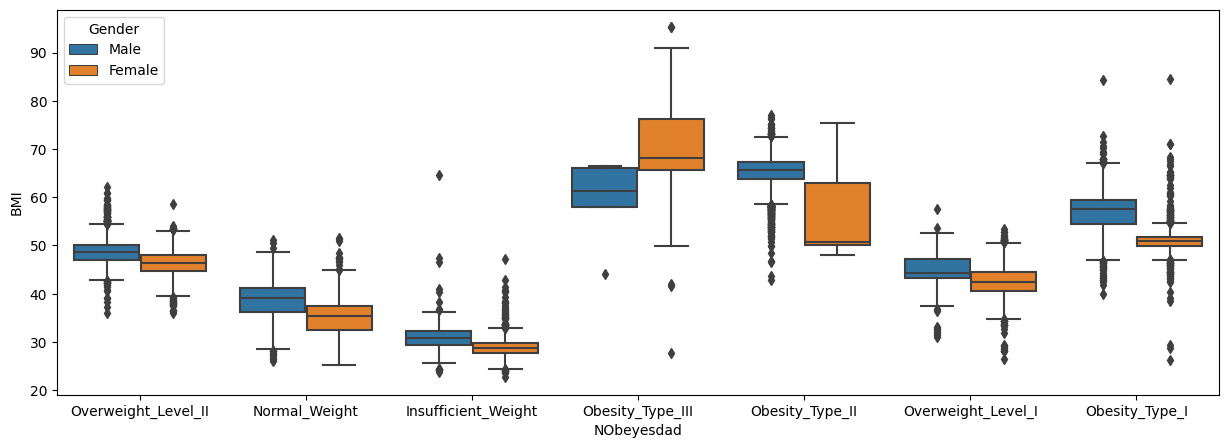

In [63]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=df,x='NObeyesdad',y='BMI', hue='Gender')

<Axes: xlabel='index'>

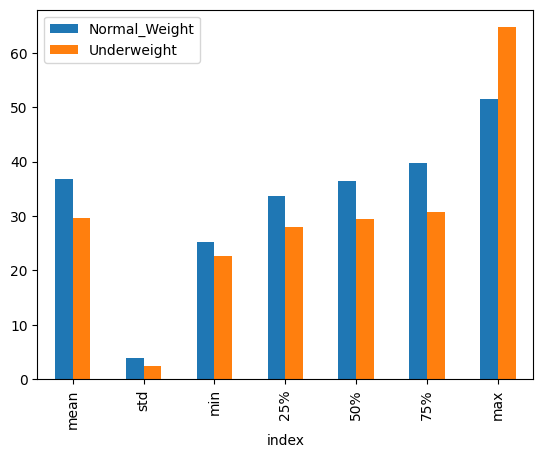

In [64]:
describe_df=df['BMI'][df['NObeyesdad']=='Normal_Weight'].describe().reset_index()
describe_df.rename(columns={'BMI':'Normal_Weight'}, inplace=True)
describe_df['Underweight']=df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].describe().reset_index().BMI
describe_df.drop(0).plot.bar(x='index')

count    2523.000000
mean       29.561223
std         2.376916
min        22.689706
25%        28.006269
50%        29.411765
75%        30.759807
max        64.669976
Name: BMI, dtype: float64

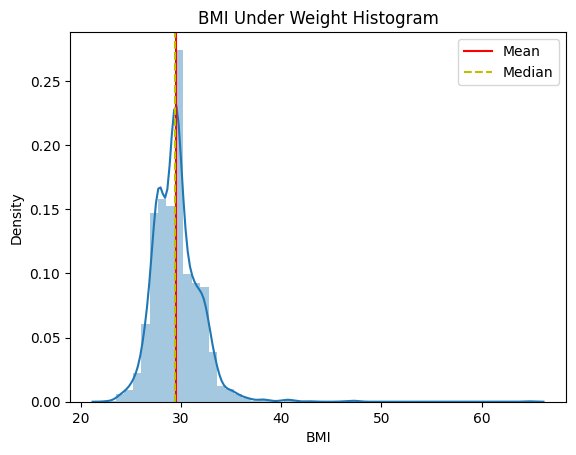

In [65]:
sns.distplot(df['BMI'][df['NObeyesdad']=='Insufficient_Weight'],kde=True).set(title= 'BMI Under Weight Histogram')
plt.axvline(df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].mean(),color='r', label='Mean')
plt.axvline(df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].median(),color='y', linestyle='--',label='Median')
plt.legend()
df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].describe()

count    3082.000000
mean       36.745113
std         4.012057
min        25.149701
25%        33.742331
50%        36.419753
75%        39.757165
max        51.497006
Name: BMI, dtype: float64

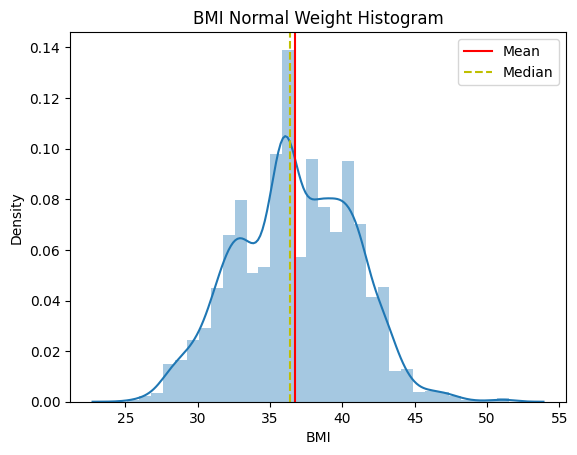

In [66]:
sns.distplot(df['BMI'][df['NObeyesdad']=='Normal_Weight'],kde=True).set(title= 'BMI Normal Weight Histogram')
plt.axvline(df['BMI'][df['NObeyesdad']=='Normal_Weight'].mean(),color='r', label='Mean')
plt.axvline(df['BMI'][df['NObeyesdad']=='Normal_Weight'].median(),color='y', linestyle='--',label='Median')
plt.legend()
df['BMI'][df['NObeyesdad']=='Normal_Weight'].describe()

## Analysis:
BMI for the data doesn't reflect any linear relationship with obesity classification, and in contrast of the earlier assumption there are significant amount of outliers.It indicates that there must exist unaccounted, linear or non linear variables.We can have following scenarios;
1. delete the outliers, from the training dataset and train the model based on linearly related data only. 
1. Keep the data intact and add a 3 cluster column to it based on Height, Gender and Weight and/or Gender and BMI we can also add age in some equations to identify nonlinear relations.

In this Notebook we will go with option two and will create two K-mean Clusters.

In order to create clusters with Gender, we need to convert Gender into Numeric Column, Modifying the dataset, so let's make a copy of training data. before moving further

In [67]:
train_df=df.drop(columns='id')
test_df=test.drop(columns='id')

train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

## Now let's convert the labelled Catergorical Columns in Numeric/Boolean

In [68]:
cat_cols.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [69]:
train_df=pd.get_dummies(train_df,columns=['Gender','family_history_with_overweight','SMOKE','MTRANS','SCC','FAVC','CAEC'],dtype=int)
test_df=pd.get_dummies(test_df,columns=['Gender','family_history_with_overweight','SMOKE','MTRANS','SCC','FAVC','CAEC'],dtype=int)

In [70]:
test_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,BMI,...,MTRANS_Public_Transportation,MTRANS_Walking,SCC_no,SCC_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,Sometimes,65.273262,...,1,0,1,0,0,1,0,0,1,0
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,Sometimes,41.250000,...,1,0,1,0,0,1,0,0,1,0
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,Sometimes,67.910192,...,1,0,1,0,0,1,0,0,1,0
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,Sometimes,66.748641,...,1,0,1,0,0,1,0,0,1,0
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,Sometimes,64.419076,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,Sometimes,45.330027,...,1,0,1,0,1,0,0,0,1,0
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,Sometimes,38.993711,...,1,0,1,0,0,1,0,0,1,0
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,Sometimes,27.988219,...,1,0,1,0,0,1,0,1,0,0
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,no,32.716049,...,1,0,1,0,0,1,0,0,1,0


## Labelling the NObeyesdad and CALC Column
Since test dataset has one additional unique value for CALC column i-e Always, So we need to encode the column separately

In [71]:
test['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [72]:
train_df['NObeyesdad'] = df['NObeyesdad'].map({'Overweight_Level_II':0, 'Normal_Weight':1,'Insufficient_Weight':2,'Obesity_Type_III':3,'Obesity_Type_II':4,'Overweight_Level_I':5,'Obesity_Type_I':6})
train_df['CALC'] = df['CALC'].map({'no':0, 'Sometimes':1,'Frequently':2,'Always':3})
test_df['CALC'] = test['CALC'].map({'no':0, 'Sometimes':1,'Frequently':2,'Always':3})


In [73]:
train_df['NObeyesdad'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [74]:
train_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'NObeyesdad', 'BMI', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'SMOKE_no', 'SMOKE_yes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_no', 'SCC_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no'],
      dtype='object')

In [75]:
test_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'BMI', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'SMOKE_no', 'SMOKE_yes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_no', 'SCC_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no'],
      dtype='object')

# Creating Clusterred Features

In [76]:
def cluster(X, n):
    from sklearn import cluster
    agglo = cluster.KMeans(n_clusters=n,random_state=0, n_init="auto")
    agglo.fit(X)
    return ((agglo.labels_+1)/n)

X=train_df[['BMI', 'Gender_Female', 'Gender_Male']]
train_df['Cluster-1']=cluster(X,5)  
X=train_df[['Gender_Female', 'Gender_Male','Age']]
train_df['Cluster-2']=(cluster(X,5))  

X=test_df[['BMI', 'Gender_Female', 'Gender_Male']]
test_df['Cluster-1']=(cluster(X,5)) 
X=test_df[['Gender_Female', 'Gender_Male','Age']]
test_df['Cluster-2']=(cluster(X,5)) 

# Creating Features by Binning the Continuous Data

## Analyzing the Continuous Numeric Columns

In [77]:
num_cols.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [78]:
num_cols.nunique()

Age       1703
Height    1833
Weight    1979
FCVC       934
NCP        689
CH2O      1506
FAF       1360
TUE       1297
dtype: int64

Post Analiysis, nothing specific identified, apart of Age and weight columns to define the binning. Using clustering to bin the columns uniform number of clusters (5) for each.

In [79]:
n=5 # Number of CLusters
for col in num_cols:
    col_name=col+'_bin'
    #train_df[col_name]=cluster(train_df[[col]],n)
    #test_df[col_name]=cluster(test_df[[col]],n)

train_df.head(20)
    

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,NObeyesdad,...,SCC_no,SCC_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,Cluster-1,Cluster-2
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,0,...,1,0,0,1,0,0,1,0,0.4,1.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,1,...,1,0,0,1,0,1,0,0,0.2,0.6
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,2,...,1,0,0,1,0,0,1,0,0.6,0.6
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,3,...,1,0,0,1,0,0,1,0,1.0,0.2
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,0,...,1,0,0,1,0,0,1,0,0.4,0.8
5,18.128249,1.748524,51.552595,2.919751,3.000000,2.137550,1.930033,1.000000,1,2,...,1,0,0,1,0,0,1,0,0.6,0.6
6,29.883021,1.754711,112.725005,1.991240,3.000000,2.000000,0.000000,0.696948,1,4,...,1,0,0,1,0,0,1,0,0.8,0.8
7,29.891473,1.750150,118.206565,1.397468,3.000000,2.000000,0.598655,0.000000,1,4,...,1,0,0,1,0,0,1,0,0.8,0.8
8,17.000000,1.700000,70.000000,2.000000,3.000000,3.000000,1.000000,1.000000,0,5,...,0,1,0,1,0,0,1,0,0.2,0.6
9,26.000000,1.638836,111.275646,3.000000,3.000000,2.632253,0.000000,0.218645,1,3,...,1,0,0,1,0,0,1,0,0.8,1.0


In [80]:
train_df.nunique()

Age                                    1703
Height                                 1833
Weight                                 1979
FCVC                                    934
NCP                                     689
CH2O                                   1506
FAF                                    1360
TUE                                    1297
CALC                                      3
NObeyesdad                                7
BMI                                   12543
Gender_Female                             2
Gender_Male                               2
family_history_with_overweight_no         2
family_history_with_overweight_yes        2
SMOKE_no                                  2
SMOKE_yes                                 2
MTRANS_Automobile                         2
MTRANS_Bike                               2
MTRANS_Motorbike                          2
MTRANS_Public_Transportation              2
MTRANS_Walking                            2
SCC_no                          

# Correlation between Features

In [81]:
#corr = train_df.corr()
# plot the heatmap
#plt.figure(figsize=(30,30))
#s=sns.heatmap(corr,annot=True, cmap='crest')

# Creating Testing and Training Data

In [82]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [83]:
X=train_df.drop(columns=['NObeyesdad'])
y=train_df[['NObeyesdad']]

print(X.columns)
print(y.columns)
print(test_df.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'BMI', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'SMOKE_no', 'SMOKE_yes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_no', 'SCC_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'Cluster-1', 'Cluster-2'],
      dtype='object')
Index(['NObeyesdad'], dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'BMI', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'SMOKE_no', 'SMOKE_yes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_no', 'SCC_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Fr

In [84]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.8, random_state=42)
X.keys()
test_df=scale(test_df)

# Creating Training Evaluation Function

In [85]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    s=sns.heatmap(cm,annot=True, cmap='Reds')

# Training Extended Boost Classifier

Accuracy:  0.9048651252408478
Recall Score:  0.8944178734948967


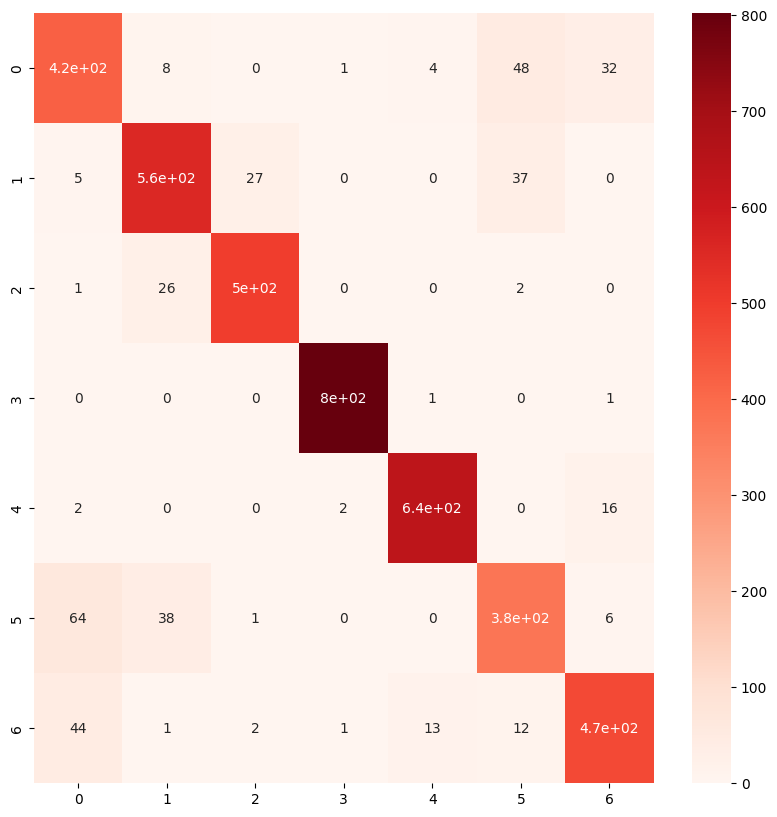

In [97]:
import xgboost as xgb
xgb.set_config(verbosity=0)
param= { 'grow_policy': 'depthwise',
         'tree_method': 'hist',
         'booster': 'gbtree',
         'objective': 'multi:softmax',
         'seed': 42,
         'n_estimators': 5000, 
         'learning_rate': 0.05, 
         'gamma': 0.53, 
         'subsample': 0.5, 
         'colsample_bytree': 0.5, 
         'max_depth': 23, 
         'min_child_weight': 21, 
         'reg_lambda': 9.15e-08,
         'reg_alpha': 5.67e-08
       }
evalset = [(X_train, y_train), (X_test,y_test)]
#tree_method="hist", multi_strategy="multi_output_tree",seed=42,colsample_bytree= 0.5,max_depth= 10, min_child_weight= 1,alpha= 10**-6,learning_rate=0.001,subsample= 0.5,n_estimators=5000
xgb_model = xgb.XGBClassifier(tree_method="hist", multi_strategy="multi_output_tree",seed=42,colsample_bytree= 0.5,max_depth= 10, min_child_weight= 1,alpha= 10**-6,learning_rate=0.001,subsample= 0.5,n_estimators=4000,
)
xgb_model.fit(X_train, y_train,eval_metric='mlogloss', eval_set=evalset, verbose=False)
y_pred = xgb_model.predict(X_test)
evaluate(y_test,y_pred)

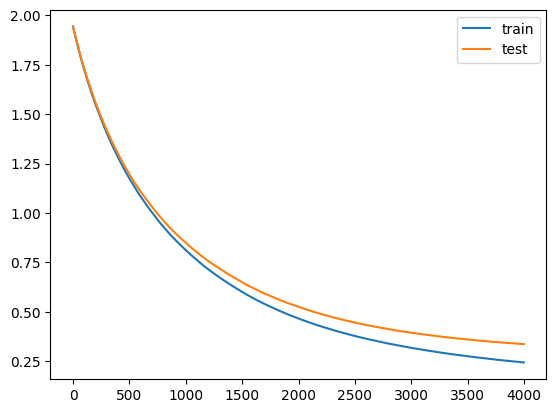

In [101]:
eval = xgb_model.evals_result()
plt.plot(eval['validation_0']['mlogloss'], label='train')
plt.plot(eval['validation_1']['mlogloss'], label='test')
plt.legend()
plt.show()

# Predicting the results

In [88]:
test['NObeyesdad']=xgb_model.predict(test_df)


In [89]:
test['NObeyesdad'].value_counts()

NObeyesdad
3    2486
1    2400
4    2220
6    2089
0    1719
2    1666
5    1260
Name: count, dtype: int64

In [90]:
submission=test[['id','NObeyesdad']]


In [91]:
submission['NObeyesdad'].unique()

array([4, 5, 3, 6, 2, 0, 1])

# Creating the Submission File

In [92]:
submission['NObeyesdad'] = test['NObeyesdad'].map({0:'Overweight_Level_II', 1:'Normal_Weight',2:'Insufficient_Weight',3:'Obesity_Type_III',4:'Obesity_Type_II',5:'Overweight_Level_I',6:'Obesity_Type_I'})
submission['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       2486
Normal_Weight          2400
Obesity_Type_II        2220
Obesity_Type_I         2089
Overweight_Level_II    1719
Insufficient_Weight    1666
Overweight_Level_I     1260
Name: count, dtype: int64

In [93]:
submission.to_csv('submission.csv', index=False)

In [94]:
submission['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       2486
Normal_Weight          2400
Obesity_Type_II        2220
Obesity_Type_I         2089
Overweight_Level_II    1719
Insufficient_Weight    1666
Overweight_Level_I     1260
Name: count, dtype: int64